In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
train_df = pd.read_csv("/kaggle/input/playground-series-s3e14/train.csv")
test_df = pd.read_csv("/kaggle/input/playground-series-s3e14/test.csv")
sample = pd.read_csv("/kaggle/input/playground-series-s3e14/sample_submission.csv")

In [3]:
train_df

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


In [4]:
train_df.isnull().sum()

id                      0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

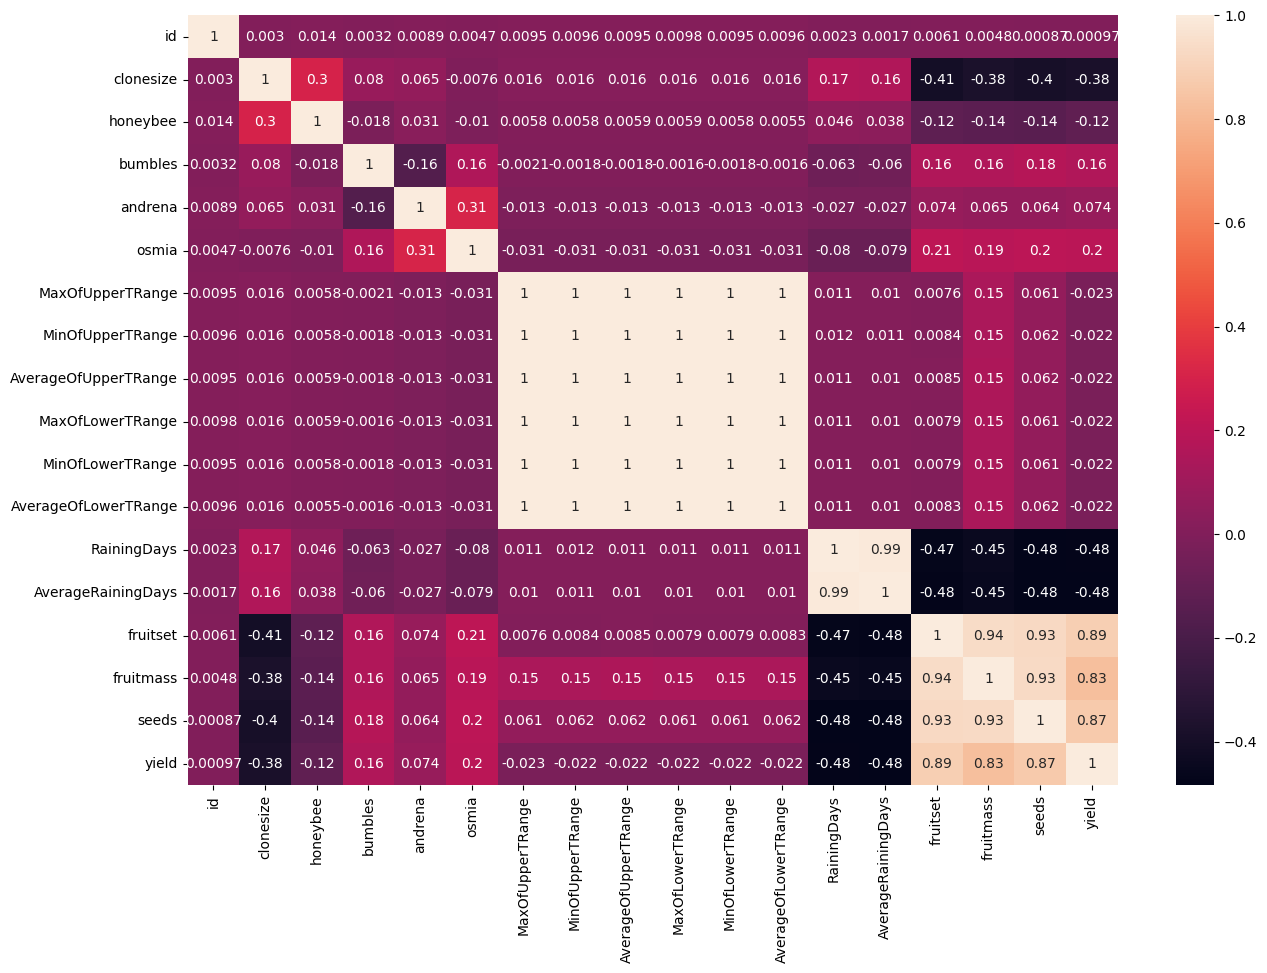

In [5]:
corr = train_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [6]:
x=train_df.drop("yield",axis=1)
y=train_df["yield"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# GradientBoostingRegressor

In [14]:
gb=GradientBoostingRegressor()

gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)

print("mean absolute error",mean_absolute_error(y_test,y_pred))
print("mean squred error",mean_squared_error(y_test,y_pred))
print("r2_score",r2_score(y_test,y_pred))

mean absolute error 349.93142558274786
mean squred error 308659.9095773998
r2_score 0.8244191167830729


In [23]:
preded_gb= gb.predict(test_df)
sample["yield"]=preded_gb
sample.to_csv("gb_submission.csv",index=False)

# PYCARET

In [16]:
%%capture
!pip install pycaret

In [17]:
%%capture
!pip install --upgrade scipy

In [18]:
from pycaret.regression import *

In [19]:
setup(data=train_df,target='yield')

,Description,Value
0,Session id,4161
1,Target,yield
2,Target type,Regression
3,Original data shape,"(15289, 18)"
4,Transformed data shape,"(15289, 18)"
5,Transformed train set shape,"(10702, 18)"
6,Transformed test set shape,"(4587, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


In [20]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,353.3744,314763.8967,560.1569,0.8223,0.1017,0.0626,0.7180
catboost,CatBoost Regressor,357.3914,316740.0268,562.0870,0.8211,0.1022,0.0633,4.2510
lightgbm,Light Gradient Boosting Machine,355.4701,317926.2717,562.8069,0.8206,0.1025,0.0631,0.5210
rf,Random Forest Regressor,364.2734,334000.4293,577.1130,0.8115,0.1046,0.0645,2.8700
et,Extra Trees Regressor,373.3642,338418.4250,581.0309,0.8089,0.1052,0.0661,1.7130
lasso,Lasso Regression,378.1730,343235.3360,585.0142,0.8062,0.1067,0.0677,0.0990
llar,Lasso Least Angle Regression,378.0298,346069.9636,587.2385,0.8046,0.1068,0.0677,0.0240
xgboost,Extreme Gradient Boosting,383.3264,354191.2375,594.5719,0.8000,0.1084,0.0682,0.1650
br,Bayesian Ridge,371.1480,387176.9242,610.4126,0.7803,0.1058,0.0661,0.0240
ridge,Ridge Regression,374.6999,390171.5834,613.6441,0.7787,0.1069,0.0671,0.0220


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [22]:
pycaret_pred = best_model.predict(test_df)
sample["yield"]=pycaret_pred
sample.to_csv("pycaret_submission.csv",index=False)